In [1]:
import serial
import time
import re
import pandas as pd
import numpy as np
import pickle
import json

from IPython.display import IFrame
import serial.tools.list_ports

import pickle
import numpy as np
from pyargus.directionEstimation import *

import math
from collections import deque
from scipy.spatial import distance

from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator

import warnings
warnings.filterwarnings('ignore')

In [17]:
class Candidate():
    
    def __init__(self):
        super(Candidate, self).__init__()

        self.width = [0,12]
        self.height = [0,8]
        self.spacing = .3
              
        self.x_range = np.arange(self.width[0], self.width[1], self.spacing)
        self.y_range = np.arange(self.height[0], self.height[1], self.spacing)
    
        
    def search_insert_position(self, nums, target):
        left = 0
        right = len(nums) - 1
        
        while left <= right:
            mid = (left + right) // 2
            
            if nums[mid] == target:
                return mid
            elif target > nums[mid]:
                left = mid + 1
            else:
                right = mid - 1
        
        return right
    
    
    def get_coord(self, x, y):
        
        if x>self.width[1] or x<self.width[0] or y>self.height[1] or y<self.height[0]:
            return
        
        rect_x = self.search_insert_position(self.x_range, x)
        rect_y = self.search_insert_position(self.y_range, y)   

        return rect_x, rect_y
        
    def get_candidate(self, index, coord):
        
        if index in [2,6]:
            degrees = np.arange(67.5, 90, 0.5)
        elif index in [1,3,5,7]:
            degrees = np.arange(22.5, 67.5, 0.5)
        elif index in [4,8]:
            degrees = np.arange(0, 22.5, 0.5)

        candidates = [self.get_coord(coord[0], coord[1])]    
            
        pm = np.array([+1, -1])

        for degree in degrees:
            d = self.spacing
            while True:
                x1, x2 = coord[0] + pm*(d/np.sqrt(1+ math.tan(degree * (math.pi/180))**2))
                y1, y2 =coord[1] + pm*((d*math.tan(degree *(math.pi/180)))/np.sqrt(1+ math.tan(degree * (math.pi/180))**2))

                if (x1>self.width[1] and x2<self.width[0]) or (y1>self.height[1] and y2<self.height[0]):                                  
                    break
                
                if index == 1:
                    candidates.append(self.get_coord(x1, y1))
                elif index == 2:
                    candidates.append(self.get_coord(x1, y1))
                    candidates.append(self.get_coord(x2, y1))
                elif index==3:
                    candidates.append(self.get_coord(x2, y1))
                elif index == 4:
                    candidates.append(self.get_coord(x2, y1))
                    candidates.append(self.get_coord(x2, y2))
                elif index==5:
                    candidates.append(self.get_coord(x2, y2))
                elif index == 6:
                    candidates.append(self.get_coord(x1, y2))
                    candidates.append(self.get_coord(x2, y2))
                elif index==7:
                    candidates.append(self.get_coord(x1, y2))
                elif index == 8:
                    candidates.append(self.get_coord(x1, y1))
                    candidates.append(self.get_coord(x1, y2))
         
                d += self.spacing 
            
        return [*set(candidates)] #remove duplicates
    
    def visualize(self, candidates):
        plt.figure(figsize=(6, 4)) 
        ax = plt.axes()
        
        candidates = list(filter(lambda item: item is not None, candidates))
        
        for i in self.x_range:
            plt.axvline(x = i, color = 'b', linewidth=0.1)
        
        for i in self.y_range:
            plt.axhline(y = i, color = 'b', linewidth=0.1)
        
        for x,y in candidates:
            rect = Rectangle((self.x_range[x], self.y_range[y]),self.spacing, self.spacing)
            ax.add_patch(rect)
            
        plt.gca().invert_xaxis()
            
        clear_output(wait=True)
        plt.show()

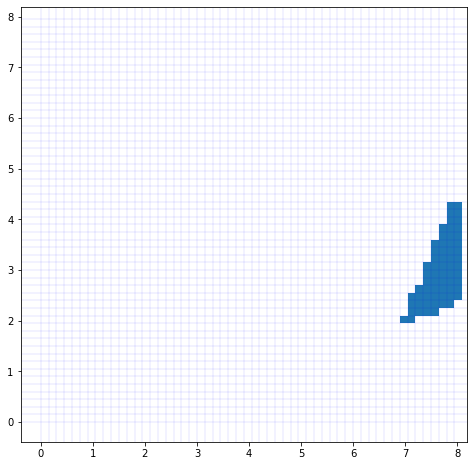

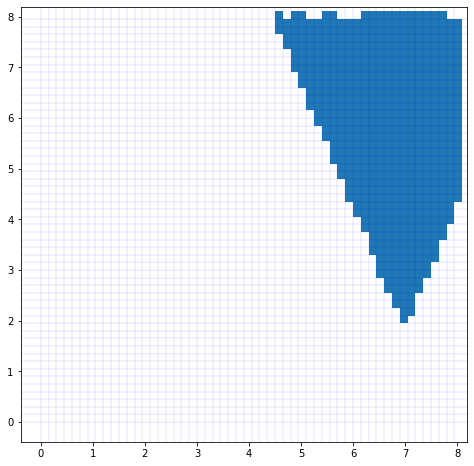

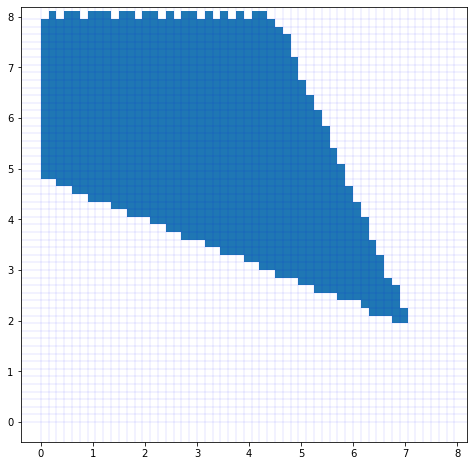

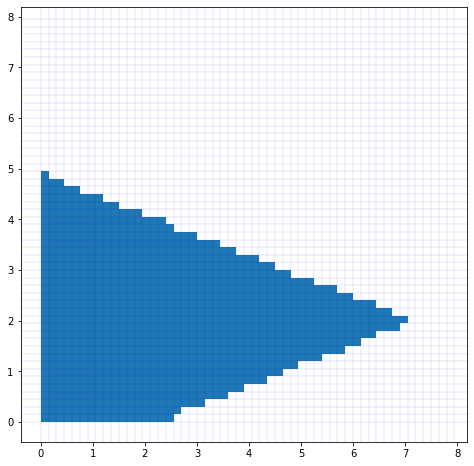

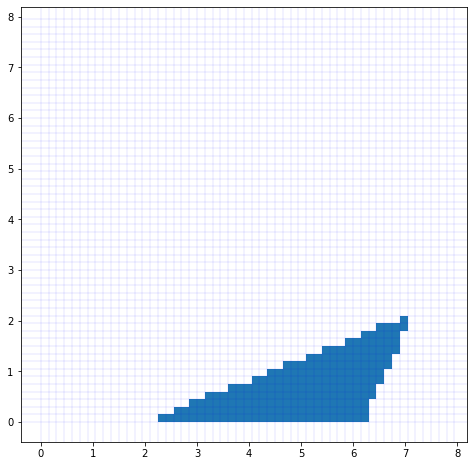

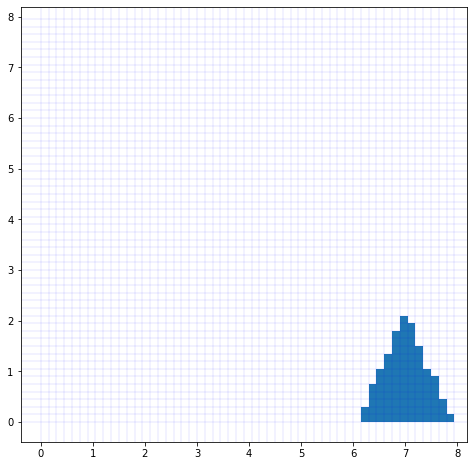

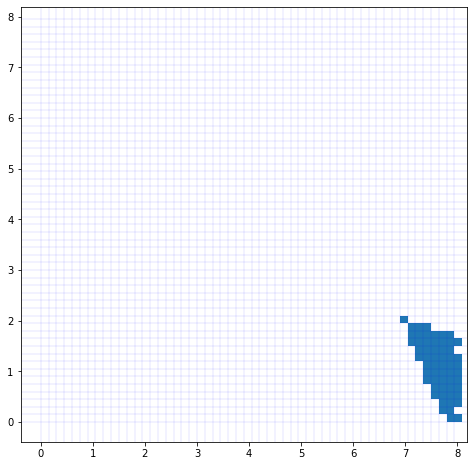

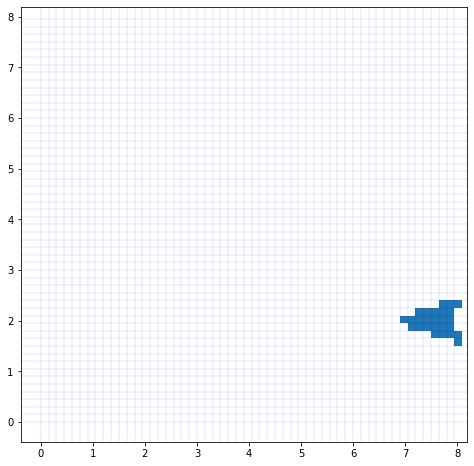

In [534]:
c = Candidate()
for direction in range(1,9):
    coords = [7, 2]
    candidates = c.get_candidate(direction,coords)
    c.visualize(candidates)

In [9]:
import librosa.display
from time import sleep
import pydbus
import pyaudio
      
import serial
import time
import re
import pandas as pd
import numpy as np
import pickle
import json

from IPython.display import IFrame
import serial.tools.list_ports

import pickle
import numpy as np
from pyargus.directionEstimation import *

import math
from collections import deque
from scipy.spatial import distance

from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator

import numpy as np
import matplotlib.pyplot as plt
import time
import wave
import IPython.display as ipd
import sklearn
from scipy.stats import kurtosis, skew
import os

import csv
from playsound import playsound

from kasa import Discover, SmartBulb, SmartPlug
from threading import Thread

import warnings
warnings.filterwarnings('ignore')

%run audio.ipynb
%run featurizer.ipynb
%run location.ipynb
%run utils.ipynb
%run direction.ipynb
%run WakeUp.ipynb
%run rf_attributes.ipynb

f = Featurizer()
f.set_utils(location_id='Arena', user_id='user_01')

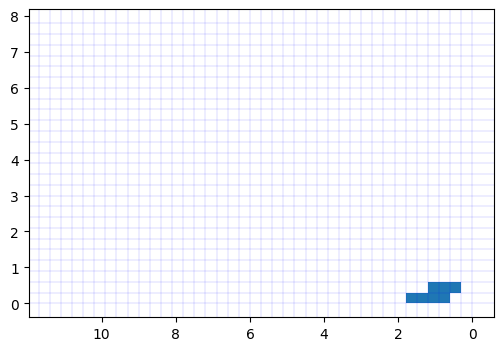


KeyboardInterrupt



In [18]:
c = Candidate()
reference = {'W': 2, 
             'SW': 3, 
             'S': 4, 
             'SE': 5, 
             'E': 6, 
             'NE': 7, 
             'N': 8, 
             'NW':1
            }

while True:
    direction = f.get_direction()
    direction = reference[direction.values[0][0]]
    coords = f.get_location()
    coords = coords.loc[0, :].values.tolist()
    candidates = c.get_candidate(direction, coords[0:2])

    c.visualize(candidates)
    